## Declaration of Authorship {.unnumbered .unlisted}

We, \[DeskB\], confirm that the work presented in this assessment is our own. Where information has been derived from other sources, we confirm that this has been indicated in the work. Where a Large Language Model such as ChatGPT has been used we confirm that we have made its contribution to the final submission clear.

Date: 11th December 2023

Student Numbers: 20017359 23032922 23081403 23103585 23130397

## Brief Group Reflection

| What Went Well | What Was Challenging |
|----------------|----------------------|
| A              | B                    |
| C              | D                    |

## Priorities for Feedback

Are there any areas on which you would appreciate more detailed feedback if we're able to offer it?



```{=html}
<style type="text/css">
.duedate {
  border: dotted 2px red; 
  background-color: rgb(255, 235, 235);
  height: 50px;
  line-height: 50px;
  margin-left: 40px;
  margin-right: 40px
  margin-top: 10px;
  margin-bottom: 10px;
  color: rgb(150,100,100);
  text-align: center;
}
</style>
```

{{< pagebreak >}}





# Response to Questions


**Import all packages**

In [2]:
import os
import spacy
import pandas as pd
import numpy as np
import geopandas as gpd
import re
import math
import string
import unicodedata
import gensim
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import nltk
import seaborn as sns
import ast  # 用于安全地将字符串转换为列表
import umap

import contextily as ctx
import urllib.request

from PIL import Image, ImageDraw

from scipy.spatial import cKDTree
from scipy.spatial.distance import cdist
from scipy.ndimage import convolve
from shapely.geometry import Point

from sklearn.preprocessing import OneHotEncoder  # We don't use this but I point out where you *could*
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk import ngrams, FreqDist

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.matutils import Sparse2Corpus
from gensim.matutils import corpus2dense
from gensim.models import tfidfmodel
from gensim.models import Word2Vec
from gensim.models import TfidfModel
from gensim.models import KeyedVectors
from gensim.models.ldamodel import LdaModel

from joblib import dump
from joblib import load

from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS

# Import everthing from textual/__init__.py
# Including bunch of tools and functions we could use for NLP 
from textual import *

All NLTK libraries installed...


**Loading the Data**

In [3]:
# Download and read the csv file remotely from url
host = 'http://data.insideairbnb.com'
path = 'united-kingdom/england/london/2023-09-06/data'
file = 'listings.csv.gz'
url  = f'{host}/{path}/{file}'

# Save csv file
if os.path.exists(file):
  Airbnb_Listing = pd.read_csv(file, compression='gzip', low_memory=False)
else: 
  Airbnb_Listing = pd.read_csv(url, compression='gzip', low_memory=False)
  Airbnb_Listing.to_csv(file)

# Download and read the gpkg file remotel from url
host = 'https://data.london.gov.uk'
path = 'download/london_boroughs/9502cdec-5df0-46e3-8aa1-2b5c5233a31f'
file = 'London_Boroughs.gpkg'
url  = f'{host}/{path}/{file}'

# Save gkpg file
if os.path.exists(file):
  London_boroughs = gpd.read_file(file, compression='gzip', low_memory=False)
else: 
  London_boroughs = gpd.read_file(url, compression='gzip', low_memory=False)
  London_boroughs.to_file(file, driver='GPKG')


## 1. Who collected the data? ( 2 points; Answer due Week 7 )

::: 1.[\*listings.csv](http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz) : This dataset was created by automatically scraping public information from Airbnb's Website. Murray Cox was one of the main founder and technicians of this mission driven project that aims to provide data and advocacy about Airbnb's impact on residential communities. [\[1\]]((http://insideairbnb.com/about))

2.[\*London_Boroughs.gpkg](https://data.london.gov.uk/download/london_boroughs/9502cdec-5df0-46e3-8aa1-2b5c5233a31f/London_Boroughs.gpkg) and [London-wards-2018](https://data.london.gov.uk/download/statistical-gis-boundary-files-london/08d31995-dd27-423c-a987-57fe8e952990/London-wards-2018.zip) : This dataset is an extract from [Ordnance Survey](https://www.ordnancesurvey.co.uk/) Boundary-Line product which is a specialist 1:10 000 scale boundaries dataset.

:::

An inline citation: As discussed on @insideairbnb, there are many...

A parenthetical citation: There are many ways to research Airbnb [see, for example, @insideairbnb]...


## 2. Why did they collect it? ( 4 points; Answer due Week 7 )

:::

1.[\*listings.csv](http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz) : Inside Airbnb is a mission driven project that provides data and advocacy about Airbnb's impact on residential communities. We work towards a vision where communities are empowered with data and information to understand, decide and control the role of renting residential homes to tourists.

2.[\*London_Boroughs.gpkg](https://data.london.gov.uk/download/london_boroughs/9502cdec-5df0-46e3-8aa1-2b5c5233a31f/London_Boroughs.gpkg) : With a long history and evolving from . The Ordnance Survey aims to help governments make smarter decisions that ensure our safety and security, they also show businesses how to gain a location data edge and we help everyone experience the benefits of the world outside. Under the [Public Sector Geospatial Agreement](https://www.ordnancesurvey.co.uk/customers/public-sector/public-sector-geospatial-agreement) (PSGA), Ordnance Survey (OS) provides Great Britain' national mapping services. OS creates, maintains and provides access to consistent, definitive and authoritative location data of Great Britain, aiming to help organisations to maximise the use, value and benefit of the data for the national interest and the public good. :::


**Size of Data**

In [4]:
print(f"Data frame is {Airbnb_Listing.shape[0]:,} x {Airbnb_Listing.shape[1]:,}")
#print(Airbnb_Listing.columns)

Data frame is 87,946 x 75


## 3. How was the data collected? ( 5 points; Answer due Week 8 )

::: 1.[\*listings.csv](http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz) : Inside Airbnb collects its data primarily by scraping information from the Airbnb website. This process involves the following steps:

**i.Web Scraping**: Inside Airbnb uses automated scripts to systematically browse and extract data from Airbnb's listings. These scripts navigate the website just like a human user would, but they do it much faster and on a larger scale.

**ii.Data Extraction**: Information about each listing, such as location, price, availability, number of bedrooms, reviews, and host details, is extracted and compiled.

**iii.Data Aggregation**: The collected data is then aggregated into a database. This database is organized to make it easier to analyze trends, patterns, and insights related to Airbnb's offerings in various cities and regions.

**iv.Regular Updates**: The scraping process is repeated periodically to keep the database current, capturing new listings and updates to existing ones.

**v.Public Accessibility**: The aggregated data is often made available to the public through the Inside Airbnb website, enabling researchers, policymakers, and the general public to analyze Airbnb's impact on housing markets and communities. It's important to note that web scraping practices, like those used by Inside Airbnb, may face legal and ethical considerations depending on the website's terms of service and regional laws regarding data privacy and usage.

2.[\*London_Boroughs.gpkg](https://data.london.gov.uk/download/london_boroughs/9502cdec-5df0-46e3-8aa1-2b5c5233a31f/London_Boroughs.gpkg) : "Boundary-Line for England and Wales was initially digitised from Ordnance Survey's boundary record sheets at 1:10 000 scale (or, in some cases, at larger scales). The Government Statistical Service (GSS) codes are supplied by the Office for National Statistics and General Register Office for Scotland(GROS). GIS software provides the functionality to store, manage and manipulate this digital map data. The properties of the data make it suitable as a key base for users wishing to develop applications. BoundaryLine is also suitable for use within other digital mapping systems. It's coordinated on the National Grid which allows for the easy superimposition of other data. :::


## 4. How does the method of collection impact the completeness and/or accuracy of its representation of the process it seeks to study, and what wider issues does this raise?

::: duedate
( 11 points; Answer due Week 9 )
:::

## 5. What ethical considerations does the use of this data raise?

::: duedate
( 18 points; Answer due {{< var assess.group-date >}} )
:::

## 6. With reference to the data (*i.e.* using numbers, figures, maps, and descriptive statistics), what does an analysis of Hosts and Listing types suggest about the nature of Airbnb lets in London?

::: duedate
( 15 points; Answer due {{< var assess.group-date >}} )
:::

**数据基础处理**

**Read the normed csvfile**

In [5]:
#Read the normed csv
Airbnb_Listing = pd.read_csv(os.path.join("Data","Airbnb_Listing_norm.csv"))

In [6]:
# Select the Corpus
corpus = Airbnb_Listing['description_norm'].fillna(' ').values


**向stopwords中加入额外不想要的词**

In [7]:
stopwords_extra = ['would','able']

# Latent Dirichlet Allocation 来处理'description'列

In [8]:
# 读取不同主题的coherence值,csv文件
LDA_topic_coherence_frame = pd.read_csv("./Data/coherence_values.csv")

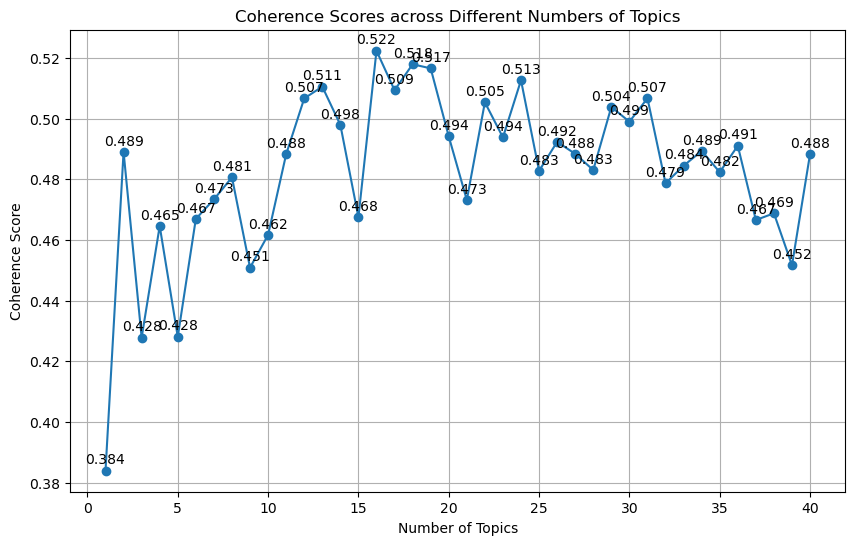

In [9]:
# 主题数量
num_topics = len(LDA_topic_coherence_frame)
# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(LDA_topic_coherence_frame['Topic_Num'], LDA_topic_coherence_frame['Coherence_Score'], marker='o')
plt.title('Coherence Scores across Different Numbers of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.grid(True)
# 为每个数据点添加标注
for x, y in zip(LDA_topic_coherence_frame['Topic_Num'], LDA_topic_coherence_frame['Coherence_Score']):
    plt.annotate(f'{y:.3f}',  # 这里是要显示的文本，即y值
                 (x, y),  # 这是要标注的点的坐标
                 textcoords="offset points",  # 指定标注的位置方式
                 xytext=(0,5),  # 指定标注文本的偏移量
                 ha='center')  # 水平居中对齐文本
plt.show()

读取先前保存的LDA 模型生成主题结果csv文件

In [10]:
# 读取先前保存的LDA 模型生成主题结果
LDA_topics_and_words_frame = pd.read_csv(os.path.join("Data","lda_topics_and_words.csv"))


LDA模型生成主题结果生成词云

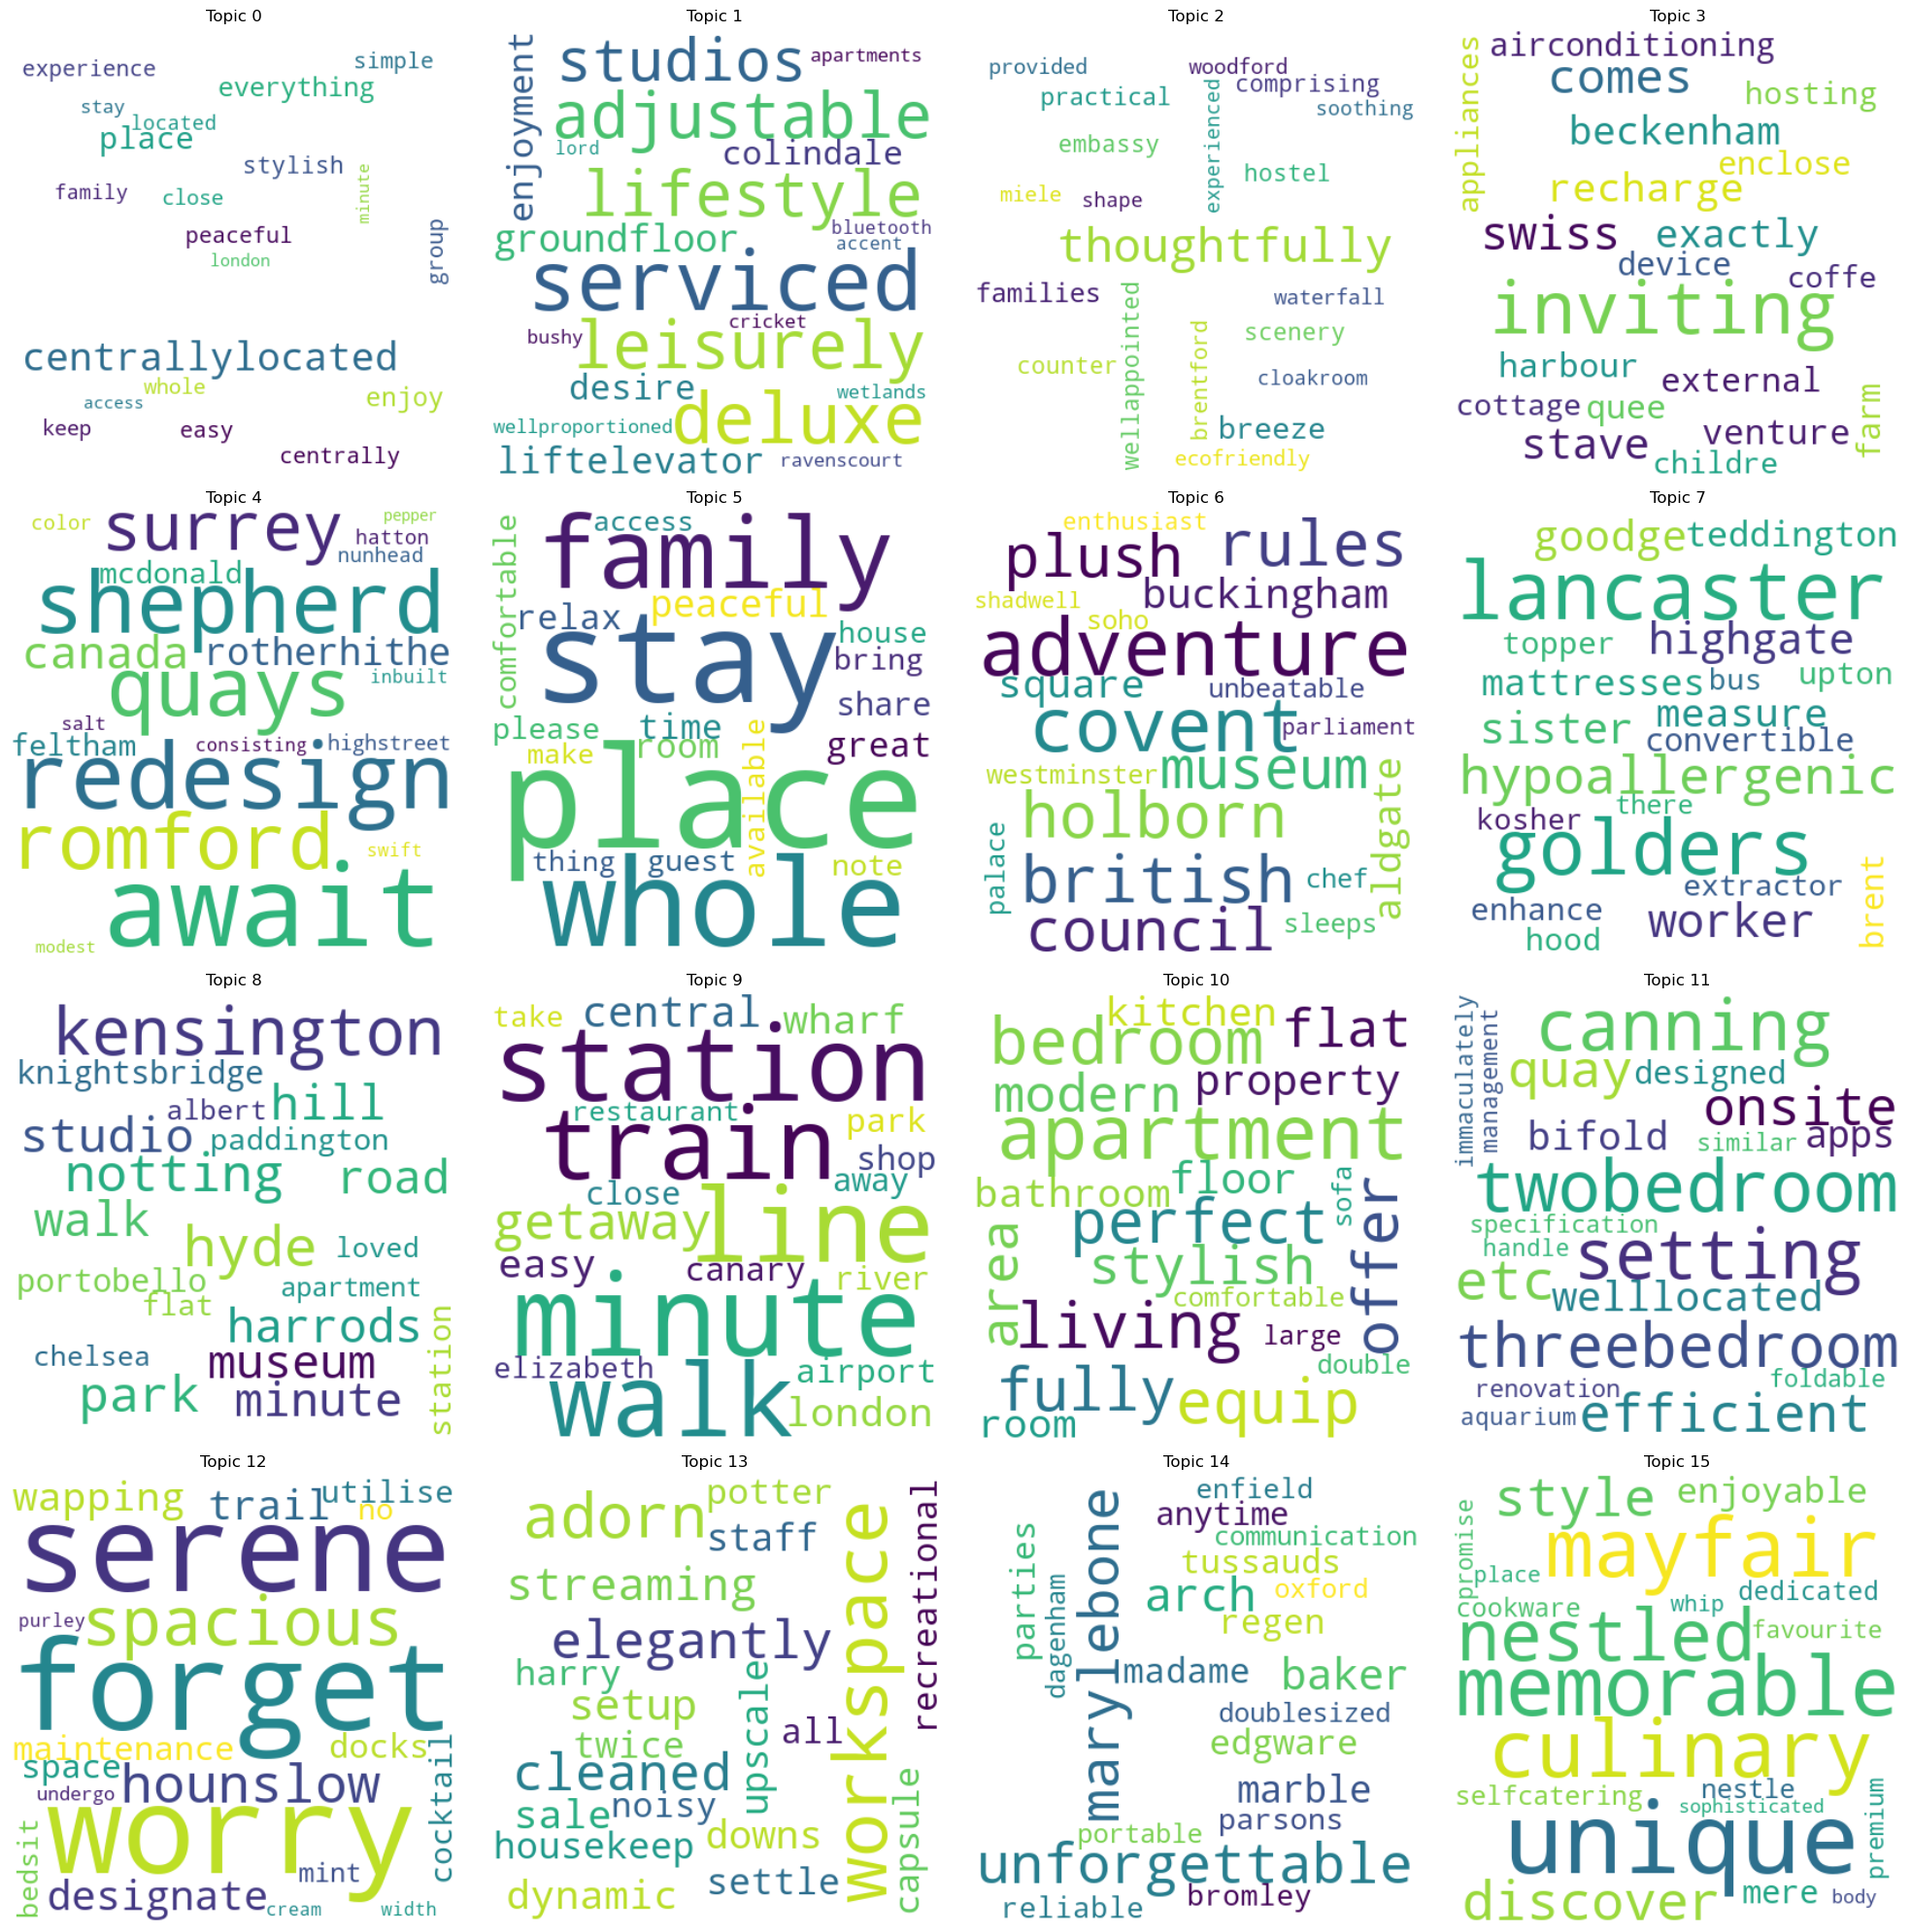

In [11]:
# LDA模型生成主题结果生成词云
# 假设您已经加载了数据

# 设置图形大小
plt.figure(figsize=(20, 20))

# 为每个主题生成词云图
for i, topic in enumerate(LDA_topics_and_words_frame['Topic'].unique()):
    # 选择当前主题的数据
    topic_data = LDA_topics_and_words_frame[LDA_topics_and_words_frame['Topic'] == topic]

    # 将单词及其权重转换为字典
    word_frequencies = {row['Word']: row['Weight'] for index, row in topic_data.iterrows()}

    # 创建子图
    ax = plt.subplot(4, 4, i + 1)

    # 生成词云
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(word_frequencies)

    # 显示词云图
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {topic}')


# 调整布局
plt.tight_layout()
plt.show()

读取每个房源的主题占比csv文件

In [14]:
# 读取每个房源的主题占比csv文件
listing_lda_topic = pd.read_csv(os.path.join("Data","listing_lda_topic.csv"))

# 可视化

分析得到的主题，并根据需要进行可视化。

**加入地理信息元素绘图**

In [15]:
Airbnb_Listing_origin = pd.read_csv(os.path.join("Data","Data_InsideAirbnb","listings.csv.gz"),low_memory=False)

C:\Users\SBH\AppData\Local\Temp\ipykernel_5320\3813638556.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  Airbnb_Listing_origin = pd.read_csv("./Data/Data_InsideAirbnb/listings.csv.gz")


In [17]:
# 每个listing的收入与average收入相比
if Airbnb_Listing_origin['price'].dtype == 'object':
    Airbnb_Listing_origin['price'] = Airbnb_Listing_origin['price'].str.replace('$', '').str.replace(',', '').astype(float)
Airbnb_Listing['sum_income'] = Airbnb_Listing_origin['minimum_nights']*2.7*Airbnb_Listing_origin['number_of_reviews_ltm']*Airbnb_Listing_origin['price']

average_income_forlisting = Airbnb_Listing['sum_income'].mean()
average_income_forlisting

7194.986408705343

In [18]:
Airbnb_Listing['profitable'] = (Airbnb_Listing['sum_income'] >= average_income_forlisting).astype(int)

In [19]:
median_income_forlisting = Airbnb_Listing['sum_income'].median()
median_income_forlisting

216.0

In [20]:
# Transfer pandas dataframe (Airbnb_listing.csv) to geopandas geodataframe
# By using the coordinates ()

# Converting to GeoDataframe
gdf_listing = gpd.GeoDataFrame(Airbnb_Listing, geometry=gpd.points_from_xy(Airbnb_Listing.longitude, Airbnb_Listing.latitude))

# Set the CRS
gdf_listing.set_crs("EPSG:4326", inplace=True)  # (EPSG:4326)

print("Converting successful")

# Drop NAs of columns ['description','amenities']
gdf_listing = gdf_listing.dropna(subset=['description','amenities'])
print(f"Now gdf has {gdf_listing.shape[0]:,} rows and {gdf_listing.shape[1]:,} columns.")

Converting successful
Now gdf has 86,679 rows and 23 columns.


**点出图**

In [21]:
gdf_listing = gdf_listing.to_crs(epsg=3857)
London_boroughs = London_boroughs.to_crs(epsg=3857)
print("gdf_listing CRS:", gdf_listing.crs)
print("London_boroughs CRS:", London_boroughs.crs)

gdf_listing CRS: EPSG:3857
London_boroughs CRS: EPSG:3857


In [22]:
gdf_listing['sum_income']=gdf_listing['sum_income'].replace(0, 1)

In [23]:

gdf_listing['log_sum_income'] = np.log(gdf_listing['sum_income'])


In [24]:
gdf_listing['log_sum_income'].value_counts()

log_sum_income
0.000000     42281
7.390181       284
8.083329       270
8.488794       223
7.795647       221
             ...  
10.963744        1
10.407431        1
6.813335         1
10.423691        1
10.981999        1
Name: count, Length: 7290, dtype: int64

<Axes: >

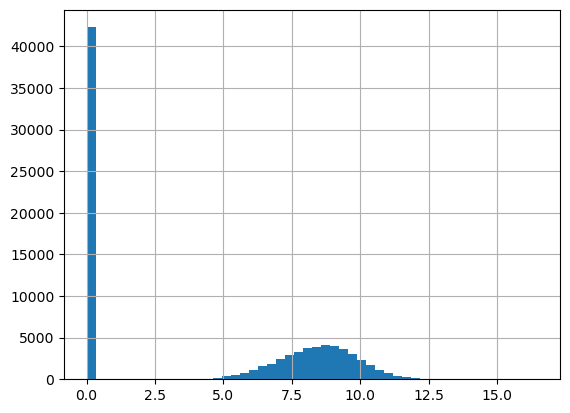

In [25]:
gdf_listing['log_sum_income'].hist(bins=50)

In [ ]:
gdf_listing

In [1]:

# 绘制地图
fig, ax = plt.subplots(figsize=(16, 16))
London_boroughs.boundary.plot(ax=ax, edgecolor='brown', linewidth=2, alpha=0.4)


boundaries = [0,1,2.5,5,6,7,7.5,8.0,8.5,9.0,9.5,10,10.5,11.0,12.5,15,20]

norm = mcolors.BoundaryNorm(boundaries, len(boundaries)-1, clip=True)


# 绘制点，根据sum_income列进行上色
# 这里假设gdf具有'geometry'列，包含点的位置
scatter = ax.scatter(gdf_listing.geometry.x, gdf_listing.geometry.y, c=gdf_listing['log_sum_income'], edgecolors=None, s=2, cmap='RdBu', alpha=0.2, norm=norm)

# 添加颜色条
plt.colorbar(scatter, ax=ax, label='Income')


ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)         #添加OSM底图

plt.show()

NameError: name 'plt' is not defined

定义IDW(反距离权重)插值函数(需要改参数，出的图不行)

In [19]:
# 定义IDW插值函数
def idw_interpolation(x, y, z, xi, yi, k=1000):
    tree = cKDTree(np.vstack((x, y)).T)
    distances, locations = tree.query(np.vstack((xi.flatten(), yi.flatten())).T, k=k)
    weights = 1 / distances
    weights /= weights.sum(axis=1)[:, None]
    # 使用循环来处理每个查询点
    zi = np.zeros(xi.shape).flatten()
    for i, loc in enumerate(locations):
        zi[i] = np.sum(weights[i] * z.iloc[loc])

    return zi.reshape(xi.shape)


In [16]:
# 更改伦敦borough边界的CRS
London_boroughs = London_boroughs.to_crs(epsg=3857)

In [21]:
# 将 DataFrame 转换为 GeoDataFrame
gdf = gpd.GeoDataFrame(
    gdf_listing, 
    geometry=gpd.points_from_xy(gdf_listing.longitude, gdf_listing.latitude)
)
gdf.crs = "EPSG:4326"  # 设置坐标参考系统为 WGS84
# 将数据从 WGS84 转换到 Web Mercator
gdf = gdf.to_crs(epsg=3857)
# 创建网格用于IDW插值
x_IDW = np.linspace(gdf.geometry.x.min(), gdf.geometry.x.max(), 960)
y_IDW = np.linspace(gdf.geometry.y.min(), gdf.geometry.y.max(), 960)
xx_IDW, yy_IDW = np.meshgrid(x_IDW, y_IDW)

# 执行 IDW 插值
zi = idw_interpolation(gdf.geometry.x, gdf.geometry.y, gdf['sum_income'], xx_IDW, yy_IDW)




In [22]:
# 对插值后的zi进行双立方卷积（使边缘平滑过渡）
# 创建一个双立方核（3x3）
convolve_kernel_2cube = np.array([[1/16, 1/8, 1/16],
                   [1/8,  1/4, 1/8],
                   [1/16, 1/8, 1/16]])
# 创建一个5*5的卷积核（5x5）
convolve_kernel_5times = np.array([[1/273, 4/273, 7/273, 4/273, 1/273],
                                    [4/273, 16/273, 26/273, 16/273, 4/273],
                                    [7/273, 26/273, 41/273, 26/273, 7/273],
                                    [4/273, 16/273, 26/273, 16/273, 4/273],
                                    [1/273, 4/273, 7/273, 4/273, 1/273]])


# 对zi应用双立方卷积
zi_smoothed = convolve(zi, convolve_kernel_5times)

643276.3384854664
577.3436843036249
3229.099426885826
182344.97559738957
1546.0849849084518
3230.6527275688895


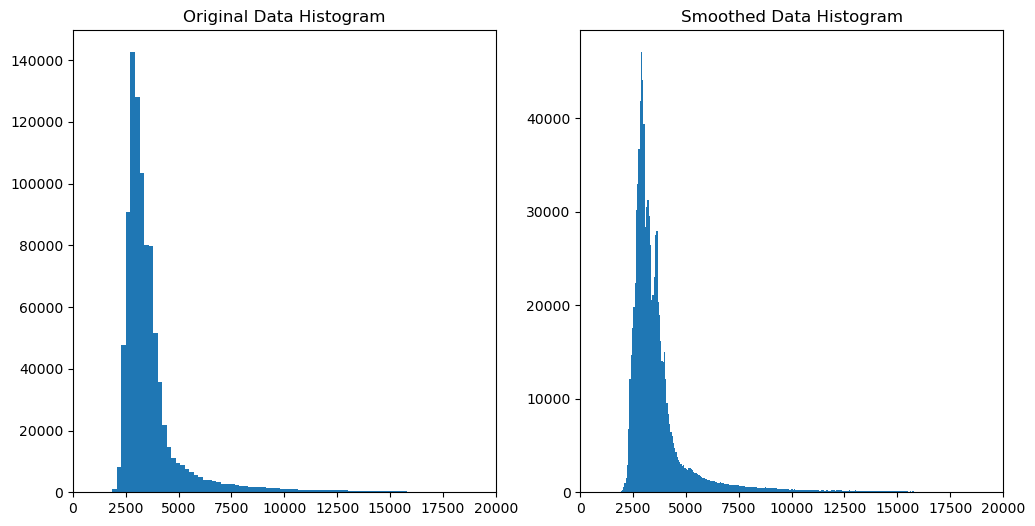

In [23]:
# 正确地将扁平化的数组转换为 pandas Series
zi_flatten = pd.Series(zi.flatten())
print(zi_flatten.max())
print(zi_flatten.min())
print(zi_flatten.median())

zi_smoothed_flatten = pd.Series(zi_smoothed.flatten())
print(zi_smoothed_flatten.max())
print(zi_smoothed_flatten.min())
print(zi_smoothed_flatten.median())

# 创建图表和轴
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 在第一个轴上绘制 zi_flatten 的直方图
ax1.hist(zi_flatten, bins=3000)  # 调整 bins 的数量以更好地展示数据分布
ax1.set_xlim(0, 20000)
ax1.set_title('Original Data Histogram')

# 在第二个轴上绘制 zi_smoothed_flatten 的直方图
ax2.hist(zi_smoothed_flatten, bins=3000)  # 同样的bins数量
ax2.set_xlim(0, 20000)
ax2.set_title('Smoothed Data Histogram')
plt.show()

In [24]:
quantiles = np.linspace(0, 1, 41)
levels = np.quantile(zi.flatten(), quantiles)
standard_format_numbers = [format(num, 'f') for num in levels]
print(standard_format_numbers)

['577.343684', '2373.123972', '2466.271512', '2544.015916', '2607.320397', '2664.417573', '2701.895269', '2745.311601', '2785.264099', '2822.202714', '2855.090210', '2886.159079', '2913.901331', '2946.066161', '2977.089660', '3011.389130', '3045.578919', '3092.897928', '3139.986060', '3185.333243', '3229.099427', '3275.386393', '3324.606048', '3383.295559', '3452.137827', '3517.123828', '3568.719410', '3618.367622', '3672.963780', '3742.406046', '3822.824093', '3923.330885', '4017.502177', '4147.161186', '4341.583886', '4646.513719', '5137.259074', '5819.590499', '7049.821832', '9510.889273', '643276.338485']


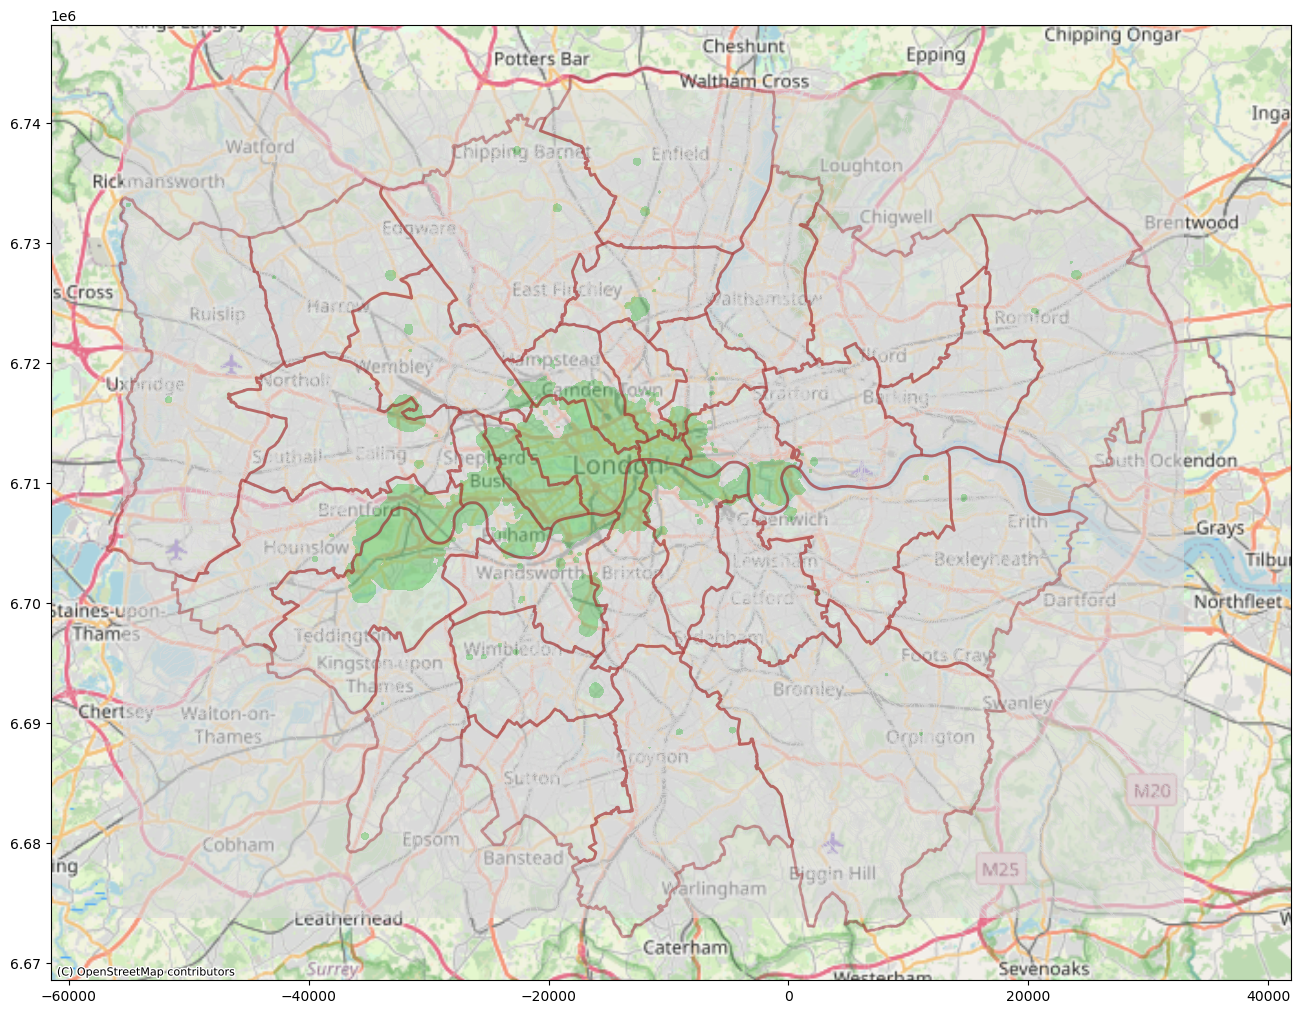

In [35]:
# 对数值进行分隔
quantiles = np.linspace(0, 1, 21)
levels = np.quantile(zi_smoothed.flatten(), quantiles)
#levels = np.array([0,2000,2500,2700,2900,3000,3400,3737,3800,4000,4200,4500,4800,5000,7000,200000])

# 绘制地图
fig, ax = plt.subplots(figsize=(16, 16))
ax.contourf(xx_IDW, yy_IDW, zi_smoothed, levels=levels, cmap="tab20c_r", alpha=0.6)
London_boroughs.boundary.plot(ax=ax, edgecolor='brown', linewidth=2, alpha=0.4)

# 设置颜色规范化
norm = mcolors.Normalize(vmin=gdf['sum_income'].min(), vmax=gdf['sum_income'].max())

# 绘制点，根据sum_income列进行上色
# 这里假设gdf具有'geometry'列，包含点的位置
#scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf['sum_income'], edgecolors=None, s=2, cmap='viridis', alpha=0.2, norm=norm)

# 添加颜色条
#plt.colorbar(scatter, ax=ax, label='Income')

#gdf.plot(ax=ax, color='black', markersize=2, alpha=0.25)               # 绘制点
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)         #添加OSM底图

plt.show()

In [ ]:
# 保存地图
# fig.savefig('london_housing_price_map.png')

# Word2Vec 可视化

词向量可视化

In [53]:
# import Word2Vec Model from index
word2vec_model = Word2Vec.load(os.path.join("Model","word2vec-d400-w10.model"))

In [54]:
# 从norm并且split后的数据读取csv
amenities_norm_split = pd.read_csv(os.path.join("Data","amenities_norm_split.csv"),low_memory=False)

# 将 'amenities' 列中的字符串转换为列表
amenities_ast_literal = amenities_norm_split
amenities_ast_literal.drop('Unnamed: 0',axis=1)

0         1           2           3        4           5  \
0      heating  standard       cable        wifi    smoke       alarm   
1       window     guard     bathtub       water   kettle  laundromat   
2      bathtub     water      kettle  laundromat   nearby     private   
3      shampoo   luggage     dropoff       allow    dryer   microwave   
4       window     guard     bathtub       water   kettle  laundromat   
...        ...       ...         ...         ...      ...         ...   
87941    water    kettle  laundromat      nearby  shampoo     luggage   
87942  bathtub      free       dryer        unit    water      kettle   
87943   window     guard     bathtub       water   kettle  laundromat   
87944    water    kettle       dryer   microwave   coffee       maker   
87945  bathtub      free       dryer        unit    water      kettle   

             6        7          8           9  ...  208  209  210  211  212  \
0        dryer  kitchen     washer  essentials  ...  NaN  NaN  NaN  NaN  NaN   
1       nearby   indoor  fireplace   microwave  ...  NaN  NaN  NaN  NaN  NaN   
2        patio  balcony       paid      street  ...  NaN  NaN  NaN  NaN  NaN   
3       coffee    maker      water        iron  ...  NaN  NaN  NaN  NaN  NaN   
4       nearby     free   driveway        park  ...  NaN  NaN  NaN  NaN  NaN   
...        ...      ...        ...         ...  ...  ...  ...  ...  ...  ...   
87941  dropoff    allow      dryer      coffee  ...  NaN  NaN  NaN  NaN  NaN   
87942  private    patio    balcony        fire  ...  NaN  NaN  NaN  NaN  NaN   
87943   nearby     paid     street        park  ...  NaN  NaN  NaN  NaN  NaN   
87944   linens     iron      patio     balcony  ...  NaN  NaN  NaN  NaN  NaN   
87945  shampoo     free     washer        unit  ...  NaN  NaN  NaN  NaN  NaN   

       213  214  215  216  217  
0      NaN  NaN  NaN  NaN  NaN  
1      NaN  NaN  NaN  NaN  NaN  
2      NaN  NaN  NaN  NaN  NaN  
3      NaN  NaN  NaN  NaN  NaN  
4      NaN  NaN  NaN  NaN  NaN  
...    ...  ...  ...  ...  ...  
87941  NaN  NaN  NaN  NaN  NaN  
87942  NaN  NaN  NaN  NaN  NaN  
87943  NaN  NaN  NaN  NaN  NaN  
87944  NaN  NaN  NaN  NaN  NaN  
87945  NaN  NaN  NaN  NaN  NaN  

[87946 rows x 218 columns]

In [55]:
# 对dataframe中'amenities'列的字符串内容进行改动
list_of_lists = amenities_ast_literal.apply(lambda row: [item for item in row if item is not None], axis=1).tolist()

amenities_norm_sentence_vec = pd.Series(list_of_lists)

Airbnb_Listing['amenities_norm_vec'] = amenities_norm_sentence_vec

In [56]:
def preprocess_and_tokenize(list_of_strings):
    processed_lists = []
    for string in list_of_strings:
        # 删除所有的 '.' 符号
        string = string.replace('.', '')
        # 替换所有连续的两个空格为一个空格
        string = string.replace('  ', ' ')
        # 分词
        tokens = string.split()
        # 将处理后的列表添加到结果中
        processed_lists.append(tokens)
    return processed_lists

In [33]:
amenities_norm_split = preprocess_and_tokenize(amenities_norm_split)

In [34]:
amenities_norm_split = pd.DataFrame(amenities_norm_split)

In [35]:
amenities_norm_split.to_csv(os.path.join("Data","amenities_norm_split.csv"))

将训练后model应用于'amenities'列

In [57]:

"""# 预处理函数
def preprocess(text):
    # 这里添加文本清洗逻辑（例如：转换为小写，去除标点等）
    return text.lower()"""

# 向量化函数
def vectorize(text, model):
    # 将文本分解为单词，并过滤掉模型词汇表中不存在的单词
    words = [word for word in text if word in model.wv.key_to_index]
    # 如果文本中没有模型已知的单词，则返回零向量
    if len(words) == 0:
        return np.zeros(model.vector_size)
    # 计算所有单词向量的平均值
    word_vectors = [model.wv[word] for word in words]
    return np.mean(word_vectors, axis=0)



In [65]:
# 应用向量化
Airbnb_Listing['amenities_vector'] = amenities_norm_sentence_vec.apply(lambda x: vectorize(x, word2vec_model))

In [67]:
amenities_vector[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [66]:

amenities_vector = Airbnb_Listing['amenities_vector']

In [50]:
Airbnb_Listing.to_csv(os.path.join("Data","Airbnb_listing_ame_vec.csv"))

KeyboardInterrupt: 

UMAP降维可视化word2vec模型

In [32]:
amenities_vector_nparray = amenities_vector.to_numpy()

In [38]:
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(amenities_vector_nparray)

ValueError: setting an array element with a sequence.

使用层次聚类图（Dendrogram）来可视化 Word2Vec 模型

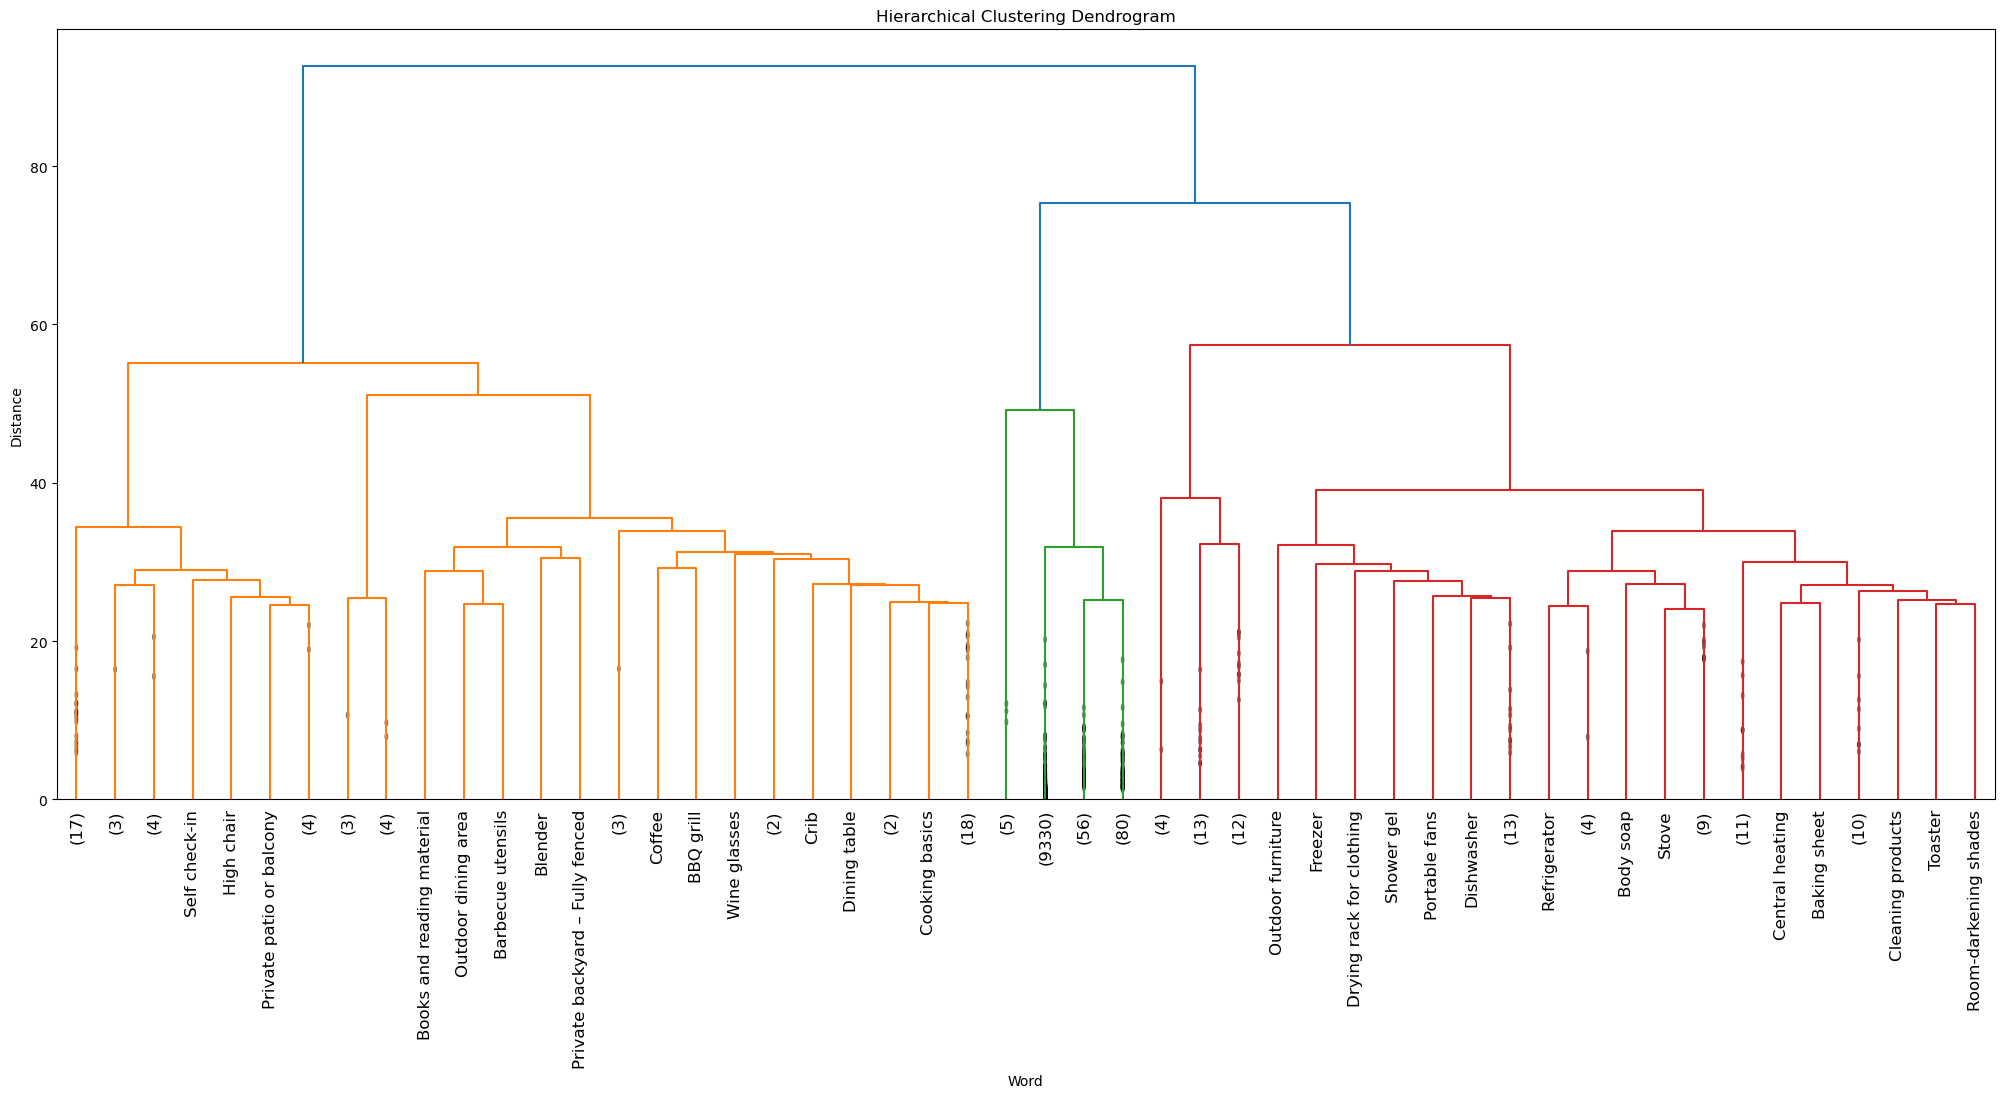

In [5]:
# 提取 Word2Vec 模型中的词向量
words = list(word2vec_model.wv.key_to_index.keys())
word_vectors = np.array([word2vec_model.wv[word] for word in words])

# 使用层次聚类算法
Z = linkage(word_vectors, 'ward')                   #这里使用 'ward' 方法，它是一种最小化方差的层次聚类方法

#绘制 Dendrogram（层次聚类图）
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Word')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # 显示最后 p 个合并的聚类
    p=50,  # 这里为例子，显示最后50个聚类
    leaf_rotation=90.,  # 旋转词汇标签
    leaf_font_size=12.,  # 字体大小
    show_contracted=True,  # 显示每个聚合的数据点数量
    labels=words  # 词汇标签
)
plt.show()


t-SNE降维可视化word2vec模型

c:\Users\SBH\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\SBH\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\SBH\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 55358 (\ud83e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SBH\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 56631 (\udd37) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SBH\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20854 (\N{CJK UNIFIED IDEOGRAPH-5176}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SBH\AppData\Roaming

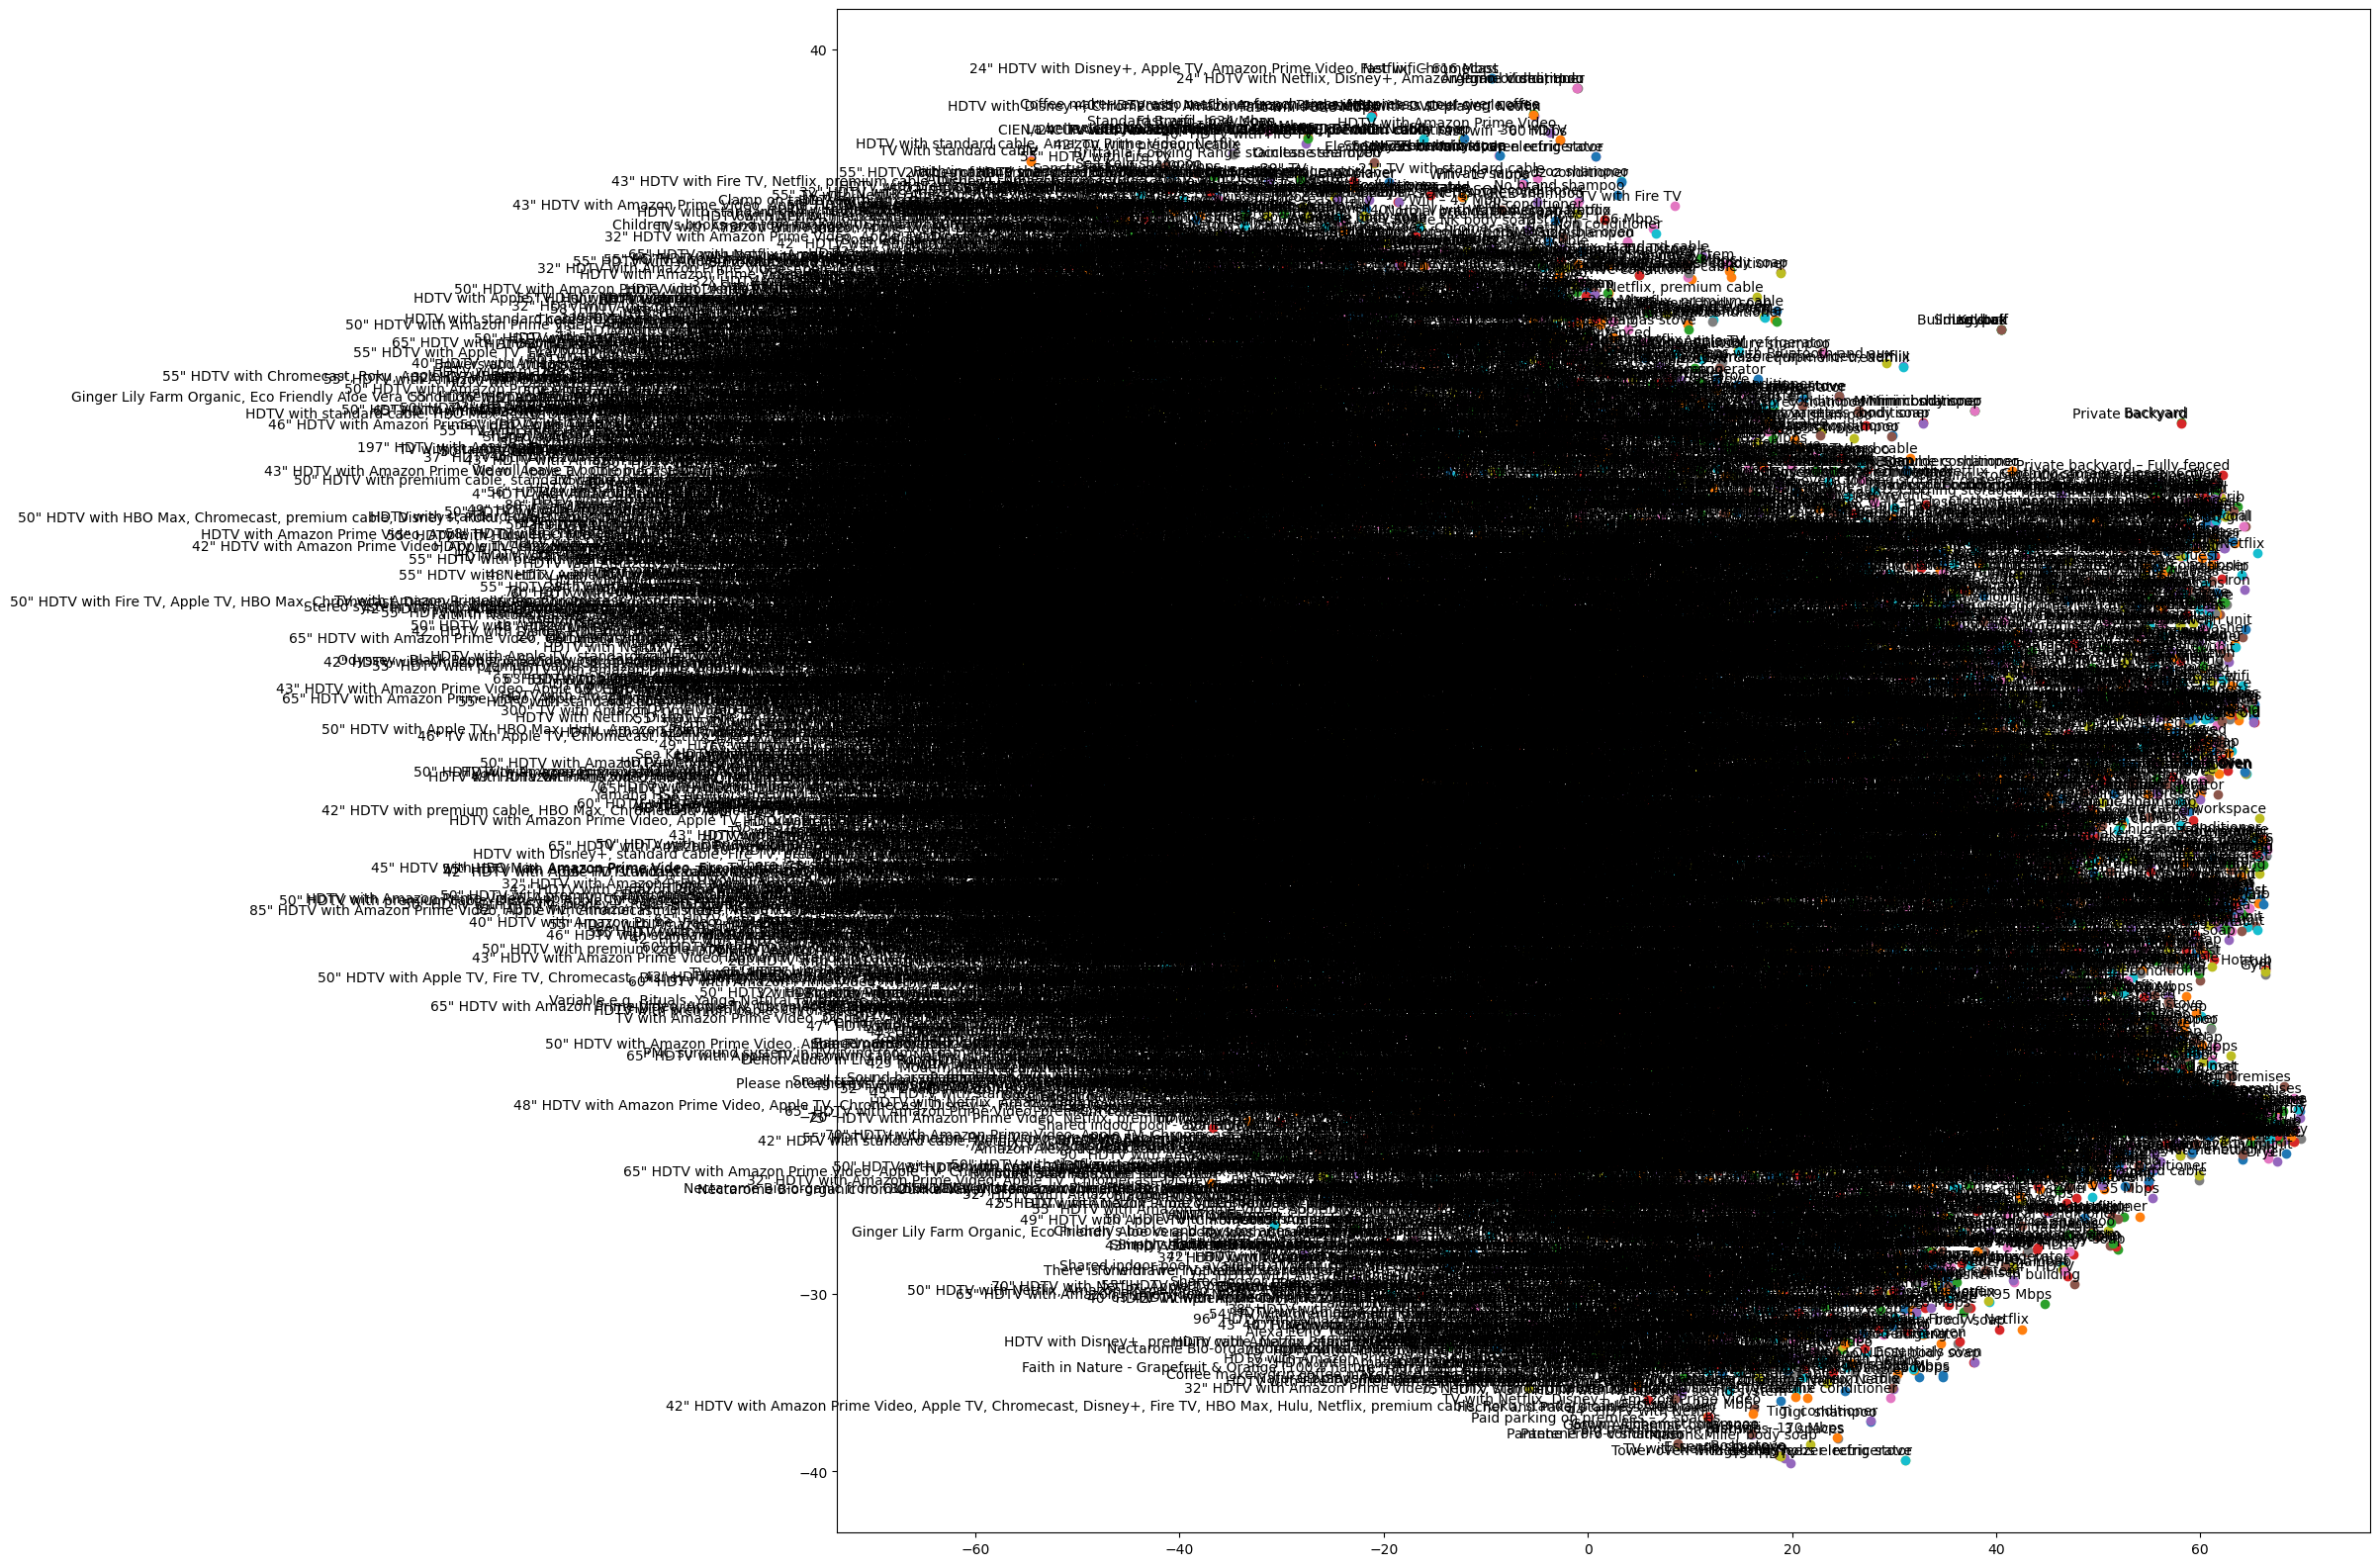

In [6]:

# 获取词汇及其对应的向量
words = list(word2vec_model.wv.key_to_index)
word_vectors = np.array([word2vec_model.wv[word] for word in words])

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# 可视化
plt.figure(figsize=(20, 20))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

**Word2Vec 模型的可视化**

除了层次聚类图和 t-SNE，还有其他几种方法可以可视化 Word2Vec 模型：

PCA（主成分分析）：类似于 t-SNE，PCA 也是一种降维技术，可以将高维空间中的词向量投影到二维或三维空间中，以便于可视化。

UMAP（Uniform Manifold Approximation and Projection）：是一种较新的降维技术，被认为在保持全局结构方面比 t-SNE 更有效。

词云（Word Cloud）：虽然不直接展示词向量的空间关系，但词云可以用来展示词汇的频率或其他权重，有助于理解模型中词汇的重要性。

网络图（Network Graphs）：可以展示词语之间的相似性或关联性，词语以节点形式出现，相似或关联的词语通过边连接。

**SVM 分类器的可视化**

对于基于 Word2Vec 模型训练的 SVM 分类器，可视化通常关注于决策边界、支持向量和分类结果：

决策边界可视化：对于二维数据，可以直接在二维平面上绘制决策边界。对于高维数据，需要先进行降维（如使用 PCA 或 t-SNE），然后在二维或三维空间中绘制。

支持向量显示：在可视化图中标出支持向量的位置，这有助于理解模型如何做出决策。

热图（Heatmap）：显示不同特征对分类决策的影响程度，可以用来理解哪些维度在分类中起到关键作用。

误差分析：可视化分类错误的实例，分析模型在哪些类型的数据上性能不佳。

由于 SVM 是一种监督学习算法，可视化这类模型时，重点通常在于展示模型如何在特征空间中划分不同的类别。需要注意的是，由于 Word2Vec 生成的特征空间维度通常很高，直接可视化 SVM 的决策边界可能需要先进行降维处理。此外，可视化结果应该结合具体的应用场景和数据特性来解释

## 7. Drawing on your previous answers, and supporting your response with evidence (e.g. figures, maps, and statistical analysis/models), how *could* this data set be used to inform the regulation of Short-Term Lets (STL) in London?

::: duedate
( 45 points; Answer due {{< var assess.group-date >}} )
:::

## Sustainable Authorship Tools

Your QMD file should automatically download your BibTeX file. We will then re-run the QMD file to generate the output successfully.

Written in Markdown and generated from [Quarto](https://quarto.org/). Fonts used: [Spectral](https://fonts.google.com/specimen/Spectral) (mainfont), [Roboto](https://fonts.google.com/specimen/Roboto) ([sansfont]{style="font-family:Sans-Serif;"}) and [JetBrains Mono](https://fonts.google.com/specimen/JetBrains%20Mono) (`monofont`).

## References